Predicting survival rate of passengers on Titanic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
Train = pd.read_csv('train.csv')
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Train.shape

(891, 12)

In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
Train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
Train['Age']=Train['Age'].fillna(Train['Age'].median())
Train['Age'].isna().sum()

0

In [9]:
Train['Embarked'].mode()

0    S
dtype: object

In [10]:
Train['Embarked']=Train['Embarked'].fillna(('S'))
Train['Embarked'].isna().sum()

0

In [11]:
Train.drop('Name',inplace=True,axis=1)


In [12]:
Train=Train.drop('Cabin',axis=1)

In [13]:
Train=Train.drop('Fare',axis=1)

In [14]:
Train=Train.drop('Ticket',axis=1)

In [15]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [16]:
Train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

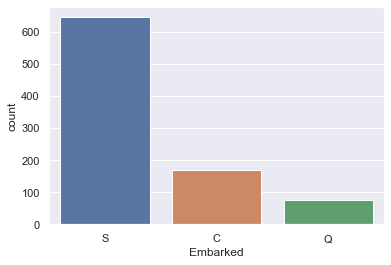

In [17]:
sn.set(style='darkgrid')
sn.countplot(Train['Embarked'])

In [18]:
Train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

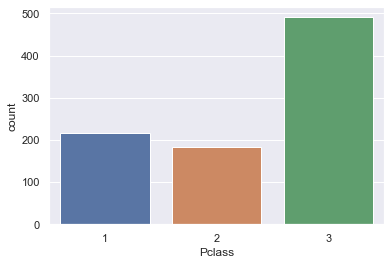

In [19]:
sn.set(style='darkgrid')
sn.countplot(Train['Pclass'])

In [20]:
Train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

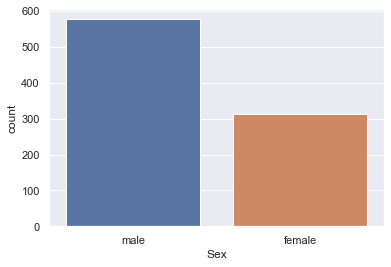

In [21]:
sn.set(style='darkgrid')
sn.countplot(Train['Sex'])

In [22]:
Train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
Train['Adults']=0

In [24]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Adults
0,1,0,3,male,22.0,1,0,S,0
1,2,1,1,female,38.0,1,0,C,0
2,3,1,3,female,26.0,0,0,S,0
3,4,1,1,female,35.0,1,0,S,0
4,5,0,3,male,35.0,0,0,S,0


In [25]:
Train['Adults'][Train['Age']>=18]=1

C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Adults
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,1
2,3,1,3,female,26.0,0,0,S,1
3,4,1,1,female,35.0,1,0,S,1
4,5,0,3,male,35.0,0,0,S,1


In [27]:
Train['Adults'].value_counts()

1    778
0    113
Name: Adults, dtype: int64

In [28]:
print("Adult Passengers:",str(len(Train[Train['Adults']==1])))

Adult Passengers: 778


In [29]:
print("Minor Passengers:",str(len(Train[Train['Adults']==0])))

Minor Passengers: 113


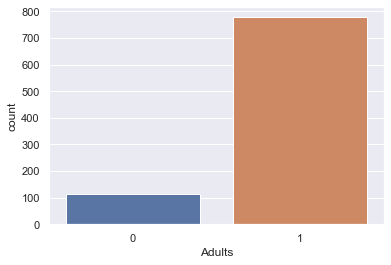

In [30]:
sn.set(style='darkgrid')
sn.countplot(Train['Adults'])

In [31]:
print("Number of all passengers aboard:",str(len(Train['PassengerId'])))

Number of all passengers aboard: 891


In [32]:
Train.drop('Age',inplace=True,axis=1)

In [33]:
Train.drop('SibSp',inplace=True,axis=1)

In [34]:
Train.drop('Parch',inplace=True,axis=1)

In [35]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Adults
0,1,0,3,male,S,1
1,2,1,1,female,C,1
2,3,1,3,female,S,1
3,4,1,1,female,S,1
4,5,0,3,male,S,1


In [36]:
def make_pivot (param1, param2):
    df_slice = Train[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

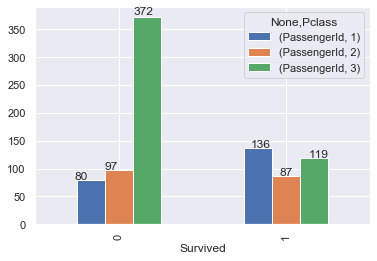

In [37]:
make_pivot('Survived','Pclass')

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

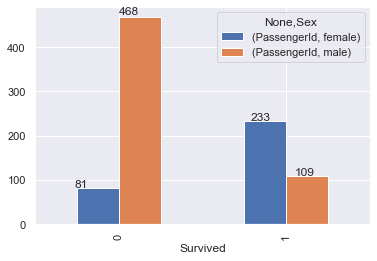

In [38]:
make_pivot('Survived','Sex')

PassengerId     
Adults             0    1
Survived                 
0                 52  497
1                 61  281

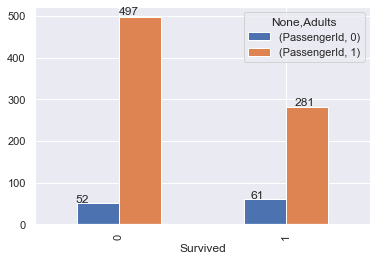

In [39]:
make_pivot('Survived','Adults')

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

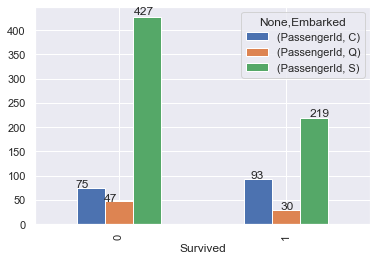

In [40]:
make_pivot('Survived','Embarked')

In [41]:
x= Train[['Pclass','Sex','Embarked','Adults']]
x.head()

,Pclass,Sex,Embarked,Adults
0,3,male,S,1
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,1


In [42]:
Y= Train['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
x['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [44]:
x["Embarked"][Train["Embarked"] == "S"] = 1
x["Embarked"][Train["Embarked"] == "C"] = 2
x["Embarked"][Train["Embarked"] == "Q"] = 3

C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\asra\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asra\an

In [45]:
x["Sex"][Train["Sex"] == "male"] = 1
x["Sex"][Train["Sex"] == "female"] = 2

C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
x.head()

,Pclass,Sex,Embarked,Adults
0,3,1,1,1
1,1,2,2,1
2,3,2,1,1
3,1,2,1,1
4,3,1,1,1


In [47]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
type(Y)

pandas.core.series.Series

In [49]:
headers = np.array(list(x.columns.values))
headers

array(['Pclass', 'Sex', 'Embarked', 'Adults'], dtype='<U8')

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif

test = SelectKBest(f_classif, k='all')
test_fit = test.fit(x, Y)
feat_score = test_fit.scores_.round(3)
p_values = -np.log10(test_fit.pvalues_).round(3)

In [51]:
feature_list = list(x.columns.values)
selected_features = test.get_support([test_fit])
selected_features

array([0, 1, 2, 3], dtype=int64)

In [52]:
temp_list = [ ]

for i in selected_features:
    temp_list.append({'Feature':feature_list[i], 'P_Value':p_values[i], 'Score': feat_score[i]  })
    
feat_select = pd.DataFrame(temp_list)

In [53]:
feat_select = feat_select.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [54]:
feat_select = feat_select.set_index('Feature')

In [55]:
feat_select

,P_Value,Score
Feature,,
Sex,68.852,372.406
Pclass,24.596,115.031
Adults,3.594,13.485
Embarked,2.851,10.259


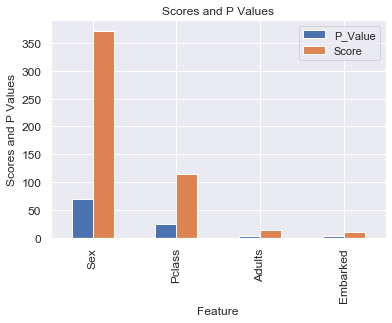

In [56]:
ax = feat_select[['P_Value','Score']].plot(kind='bar', title ="Scores and P Values",  legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Scores and P Values", fontsize=12)
plt.show()


In [57]:
x.drop('Embarked',axis=1,inplace=True)

C:\Users\asra\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
x.head()

,Pclass,Sex,Adults
0,3,1,1
1,1,2,1
2,3,2,1
3,1,2,1
4,3,1,1


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

In [62]:
X_train.shape

(623, 3)

In [63]:
X_test.shape

(268, 3)

In [65]:
Y_test.shape

(268,)

In [66]:
Y_train.shape

(623,)

In [67]:
X_train.head()

,Pclass,Sex,Adults
445,1,1,0
650,3,1,1
172,3,2,0
450,2,1,1
314,2,1,1


In [68]:
Y_train.head()

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

In [70]:
X_test.head()

,Pclass,Sex,Adults
709,3,1,1
439,2,1,1
840,3,1,1
720,2,2,0
39,3,2,0


In [71]:
Y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [73]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [75]:
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [77]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.8921106671106672


In [78]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 6, 'weights': 'distance'}


In [80]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')


In [82]:
label_pred = grid.predict(X_test)

In [84]:
acc_clf = metrics.accuracy_score(Y_test,label_pred)
print ("classifier's accuracy: ",str(acc_clf) )

classifier's accuracy:  0.7835820895522388


In [85]:
scr_clf = precision_recall_fscore_support(Y_test,label_pred, average='weighted')

print ("classifier's precision: ",str(scr_clf[0])) 
print ("classifier's recall: ",str(scr_clf[1])) 
print ("classifier's fbeta_score: ",str(scr_clf[2])) 

classifier's precision:  0.815672508537452
classifier's recall:  0.7835820895522388
classifier's fbeta_score:  0.7680794920425497


In [87]:
df_test=pd.read_csv("test.csv")

In [89]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
test_set = df_test[['Pclass', 'Sex', 'Age']].copy()

In [91]:
test_set.columns.values

array(['Pclass', 'Sex', 'Age'], dtype=object)

In [92]:
test_list = list(test_set.columns.values)

for test_item in test_list:
    print (test_item,": ",sum(pd.isnull(test_set[test_item])))

Pclass :  0
Sex :  0
Age :  86


In [93]:
test_set["Age"] = test_set["Age"].fillna(test_set["Age"].median())

In [94]:
test_set["Adult"] = 0
test_set["Adult"][test_set["Age"] >= 18] = 1



C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
test_set = test_set.drop('Age', axis=1,)

In [96]:
test_set["Sex"][test_set["Sex"] == "male"] = 1
test_set["Sex"][test_set["Sex"] == "female"] = 2

C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\asra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
test_set.head()

,Pclass,Sex,Adult
0,3,1,1
1,3,2,1
2,2,1,1
3,3,1,1
4,3,2,1


In [98]:
final_pred = grid.predict(test_set)
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
len(final_pred)

418

In [101]:
df_test['Survived'] = pd.Series(final_pred, index=df_test.index)

In [102]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [103]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)

In [104]:
final_df.shape

(418, 2)